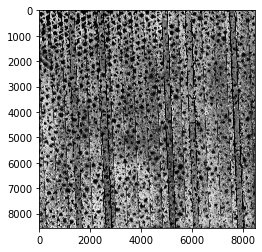

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('Sample Image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert rgb sample image to grayscale

plt.imshow(gray, cmap='gray')

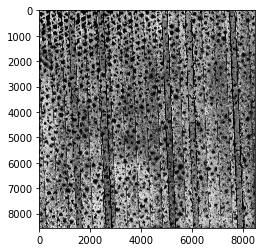

In [2]:
# making sample image blur to avoid noises
blur = cv2.GaussianBlur(gray, (11,11), 0)

plt.imshow(blur, cmap='gray')

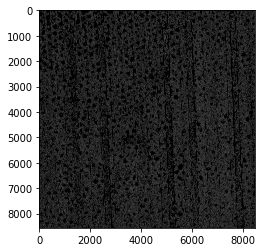

In [3]:
# detecting edges
canny = cv2.Canny(blur, 30, 150)

plt.imshow(canny, cmap='gray')

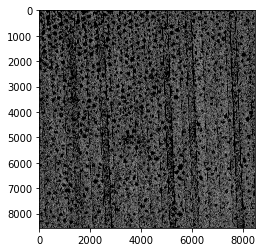

In [4]:
# making edges more visible and easy to see 
dilated = cv2.dilate(canny, (3,3), iterations = 2)  #widening of image pixel 

plt.imshow(dilated, cmap='gray') 


Number of pores =  152115


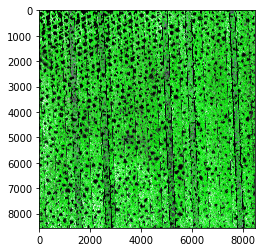

In [5]:
#counting no. of pores 
(contour, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, contour, -1, (0,255,0), 2)    #contour will go on rgb image

print("Number of pores = ", len(contour))

plt.imshow(rgb)

In [6]:
#calculating number of void/pore pixels 
area = 0
for i in range(len(contour)):
    area+=cv2.contourArea(contour[i])

print("Number of pore pixels = ", area)


#calculating total pixels in sample image
dim = image.shape
Total_Pixels = (dim[0]*dim[1])     # height*width


Number of pore pixels =  22473003.5


In [7]:
print("% Porosity of the surface =", round(area/Total_Pixels*100, 2),"%")

% Porosity of the surface = 30.89 %
